# Do delays depend more on the destination or the departure?

### Step 1: Load the Datasets

In [42]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

original_data = pd.read_csv('../flights.csv', low_memory=False)
airlines_data = pd.read_csv('../airlines.csv', low_memory=False)
airports_data = pd.read_csv('../airports.csv', low_memory=False)

In [43]:
flights_data = original_data.copy()

In [44]:
result = flights_data.groupby(['ORIGIN_AIRPORT'])['DEPARTURE_DELAY'].mean().reset_index()
result = result.sort_values(by='DEPARTURE_DELAY', ascending=False)
result = result.head(10)
result


,ORIGIN_AIRPORT,DEPARTURE_DELAY
234,14222,89.111111
460,ILG,29.391753
219,13964,28.843750
525,MVY,25.907317
453,HYA,23.182927
5,10154,22.857143
29,10581,20.111111
599,STC,18.692308
537,OTH,17.777358
325,ASE,17.587538


In [45]:
result = flights_data.groupby(['DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean().reset_index()
result = result.sort_values(by='ARRIVAL_DELAY', ascending=False)
result = result.head(10)
result

,DESTINATION_AIRPORT,ARRIVAL_DELAY
220,13964,26.906250
600,STC,23.025974
461,ILG,21.989474
223,14025,18.000000
612,TTN,17.433901
444,GUM,17.320242
538,OTH,16.740602
519,MQT,16.152027
326,ASE,15.829448
541,PBG,15.288256


In [46]:
# Create a mask to identify rows with 5-digit numbers in the "AIRPORT" column
mask = ~flights_data['ORIGIN_AIRPORT'].astype(str).apply(lambda x: x.isdigit() and len(x) == 5)
mask2 = ~flights_data['DESTINATION_AIRPORT'].astype(str).apply(lambda x: x.isdigit() and len(x) == 5)

# Filter the DataFrame using the mask to exclude rows with 5-digit numbers
flights_data = flights_data[mask]
flights_data = flights_data[mask2]

/var/folders/jk/9s_9_h9529ncq9f1q4h5rc580000gn/T/ipykernel_27630/4271785296.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flights_data = flights_data[mask2]


In [47]:
print(flights_data['ORIGIN_AIRPORT'].unique())


['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'MAF' 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'SGF' 'PHL' 'SBN'
 'RDD' 'EUG' 'IAD' 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI'
 'ATL' 'JAX' 'MFR' 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'SMX' 'IND' 'CLE'
 'GSP' 'BDL' 'ABI' 'RIC' 'BFL' 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC'
 'TYR' 'LAN' 'XNA' 'GSO' 'EWR' 'PBI' 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ'
 'MIA' 'BWI' 'LGA' 'TUL' 'LIT' 'MSY' 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT'
 'SAV' 'CLT' 'GRB' 'ABE' 'JAN' 'OAJ' 'FAR' 'ERI' 'LEX' 'CWA' 'MSO' 'TTN'
 'AMA' 'CLL' 'HOU' 'JLN' 'MLI' 'RDU' 'CVG' 'MHK' 'MOB' 'TLH' 'BHM' 'CAE'
 'TXK' 'ACY' 'DTW' 'RAP' 'TUS' 'EAU' 'DLH' 'FSD' 'INL' 'CMX' 'SPI' 'CLD'
 'COD' 'CMH' 'LRD' 'PSC' 'CPR' 'ACV' 'DAL' 'PAH' 'MRY' 'ESC' 'ISN' 'PSP'
 'MFE' 'STL' 'BTV' 'FSM' 'AEX' 'SPS' 'ACT' 'SJT' 'MTJ' 'GCC' 'OGG' 'SJC'
 'GUC' 'ORF' 'MOT' 'MLU' 'KOA' 'SAN' 'LAW' 'PIB' 'M

### Step 2: Merge Datasets

In [48]:
# Renaming columns in airports_data
airports_data_origin = airports_data.rename(columns=lambda x: x + "_ORIGIN")
airports_data_destination = airports_data.rename(
    columns=lambda x: x + "_DESTINATION")

# Merging with airlines
flights_data = pd.merge(flights_data, airlines_data,
                        left_on='AIRLINE', right_on='IATA_CODE', how='left')


# Merging with airports for departure
flights_data = pd.merge(flights_data, airports_data_origin,
                        left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')

# Merging with airports for destination
flights_data = pd.merge(flights_data, airports_data_destination,
                        left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DESTINATION', how='left')

### Step 3: Data Preprocessing

In [49]:
# You can drop or impute missing values based on your requirement
# TODO: Check if any preprocessing is required for the data
flights_data.dropna(subset=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], inplace=True)
print(flights_data['ORIGIN_AIRPORT'].unique())


['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'PHL' 'SBN' 'EUG' 'IAD'
 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI' 'ATL' 'JAX' 'MFR'
 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'IND' 'CLE' 'GSP' 'BDL' 'RIC' 'BFL'
 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC' 'TYR' 'LAN' 'GSO' 'EWR' 'PBI'
 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ' 'MIA' 'BWI' 'TUL' 'LGA' 'LIT' 'MSY'
 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT' 'SAV' 'CLT' 'GRB' 'ABE' 'JAN' 'OAJ'
 'FAR' 'ERI' 'LEX' 'CWA' 'TTN' 'RDU' 'CVG' 'BHM' 'ACY' 'DTW' 'RAP' 'TUS'
 'EAU' 'DLH' 'FSD' 'INL' 'SPI' 'CLD' 'COD' 'CMH' 'PSC' 'CPR' 'ACV' 'DAL'
 'PAH' 'MRY' 'ESC' 'ISN' 'PSP' 'CAE' 'STL' 'BTV' 'MTJ' 'GCC' 'OGG' 'SJC'
 'GUC' 'ORF' 'MOT' 'MLU' 'KOA' 'HOU' 'MOB' 'SAN' 'LAW' 'PIB' 'MGM' 'SBP'
 'COS' 'LAR' 'DRO' 'BIS' 'ITO' 'BTR' 'HLN' 'BZN' 'MDW' 'MDT' 'SCE' 'LIH'
 'TWF' 'BPT' 'GPT' 'STC' 'HPN' 'MLB' 'PLN' 'CIU' 'C

### Step 4: Analyzing Departure Delays

In [51]:
departure_delays = flights_data.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()

### Step 5: Analyzing Arrival Delays

In [52]:
destination_delays = flights_data.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean().reset_index()

### Step 6: Statistical Analysis

In [53]:
t_stat, p_value = ttest_ind(departure_delays['DEPARTURE_DELAY'], destination_delays['ARRIVAL_DELAY'])
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 7.295061768883951
P-value: 8.834125079117092e-13


In [54]:
# TODO: DELTE AFTER
print(departure_delays)

    ORIGIN_AIRPORT  DEPARTURE_DELAY
0              ABE         8.687023
1              ABI         5.747647
2              ABQ         8.798552
3              ABR        10.101056
4              ABY         8.756351
..             ...              ...
317            WRG         2.953775
318            WYS         1.375000
319            XNA        11.810889
320            YAK        -6.507692
321            YUM         1.232470

[322 rows x 2 columns]


### Step 7: Visualization

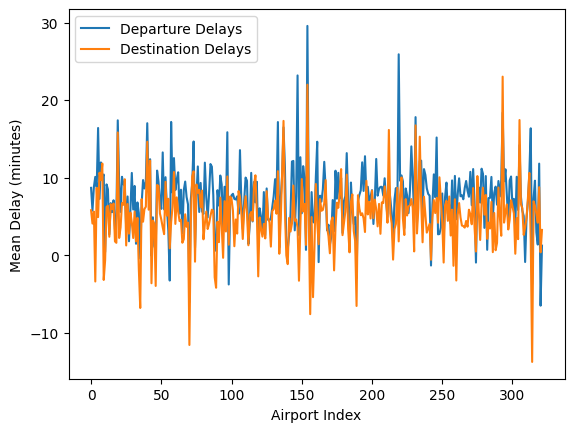

In [55]:
plt.plot(departure_delays['DEPARTURE_DELAY'], label='Departure Delays')
plt.plot(destination_delays['ARRIVAL_DELAY'], label='Destination Delays')
plt.xlabel('Airport Index')  # X-axis label
plt.ylabel('Mean Delay (minutes)')  # Y-axis label
plt.legend()
plt.show()

### Step 8: Conclusion

The low p-value (8.834125079117092e-13) provides strong evidence that there is a statistically significant difference between the means of the departure delays and arrival delays.